# EDA
- データの特徴などを確認

# ライブラリの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from collections import Counter
import ipadic

import MeCab
import re

# データの読み込み

In [2]:
data_dir = "../data/"

train_raw = pd.read_csv(f"{data_dir}raw/train.csv")
train_raw

,id,source,text,label
0,80074aa43,news4vip,まともに相手されてない人との関係なんて\nそんな大事にするものか？,0
1,6378fea6b,livejupiter,最近はアヘアヘQSマンやない？ ｲｲ!(・∀・)+1-0(・Ａ・)ｲｸﾅｲ!,0
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ\n甘えるな,1
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよな\nガチャから引いたら圧倒的歓喜レベルやで,0
4,51e4036bf,newsplus,押井は原作レイプの専門家だから\n原作マンガの真意を誤解させることに関してはプロだが\nそれ...,0
...,...,...,...,...
5251,42b5f86b0,news4vip,車じゃなくてもよくない？\nケーブル網を張り巡らせてリフトみたいなのを付けるとか,0
5252,402ce15d9,livejupiter,左やぞ？\n出すなら下水流,0
5253,0739a9fcb,newsplus,日本によって、けんけんガクガクの議論を持たらされた韓国は被害者\n\n日本人がしっかり考えな...,0
5254,d496c7dc8,news4vip,ゴムボート買って、沖まで漕いで行ったら？\n魚の血を塗っておけばサメが食べてくれるよ,0


In [3]:
test_raw = pd.read_csv(f"{data_dir}raw/test.csv")
test_raw

,id,source,text
0,001026808,news4vip,上でも言ったけどオタクレベルの知識求めてる訳じゃない\nただ囲碁やります！って人が誰1人プロ...
1,00465ac96,livejupiter,たとえば、黒人なんかは、生物学的欠陥はないのに、文化的要因で、悪循環に陥り、実力をつけられず...
2,004674725,livejupiter,そうなんやろなあ色々と勿体ない感じしたわ\n終わり方と黒幕キャラは好きやったで\n\nちなワ...
3,00474460f,news4vip,法的というか自治体ごとにバラバラの条例で定めてるだけだからな\n普通の淫行条例だと「青少年に...
4,004a7525c,newsplus,別のジャーナリストの感想として言われてるので客観的な事実とは言えないけど、\n現地は不測の事...
...,...,...,...
3218,ffc4647ac,news4vip,１人がいいのか？\nなんで変なのと同棲したのか…\nなにがしたいんだ…
3219,ffc6554ba,newsplus,ロシアもだなあ\n元々北朝鮮はロシアの工作で作られた国だから
3220,ffd3b29c2,newsplus,クネが国境に拡声器を設置して昼も夜も北の悪口鳴らしてんだとよ\nお互い当たらないように大砲撃...
3221,ffd3c69b6,news4vip,当然って言い方が腹立つんだよなあ\r\nその時点で何か男より優位に立ちたいみたいな感じがして...


In [4]:
sub_sample = pd.read_csv(f"{data_dir}raw/sample_submission.csv")
sub_sample

,id,label
0,001026808,0
1,00465ac96,0
2,004674725,0
3,00474460f,0
4,004a7525c,0
...,...,...
3218,ffc4647ac,0
3219,ffc6554ba,0
3220,ffd3b29c2,0
3221,ffd3c69b6,0


In [5]:
print(pd.read_excel(f"{data_dir}raw/data_explanation.xlsx", sheet_name=None).keys())
data_exp = pd.read_excel(f"{data_dir}raw/data_explanation.xlsx", sheet_name="カラム説明")
data_exp

dict_keys(['ファイル説明', 'カラム説明'])


,カラム名,内容
0,id,一意のid
1,source,おーぷん2ちゃんねる対話コーパスでクロールされた掲示板(「なんでも実況(ジュピター)(liv...
2,text,投稿テキスト
3,label,0:ヘイトスピーチではない。1:ヘイトスピーチ


# trainデータ

In [6]:
train = train_raw

In [7]:
train["label"].value_counts()

0    4950
1     306
Name: label, dtype: int64

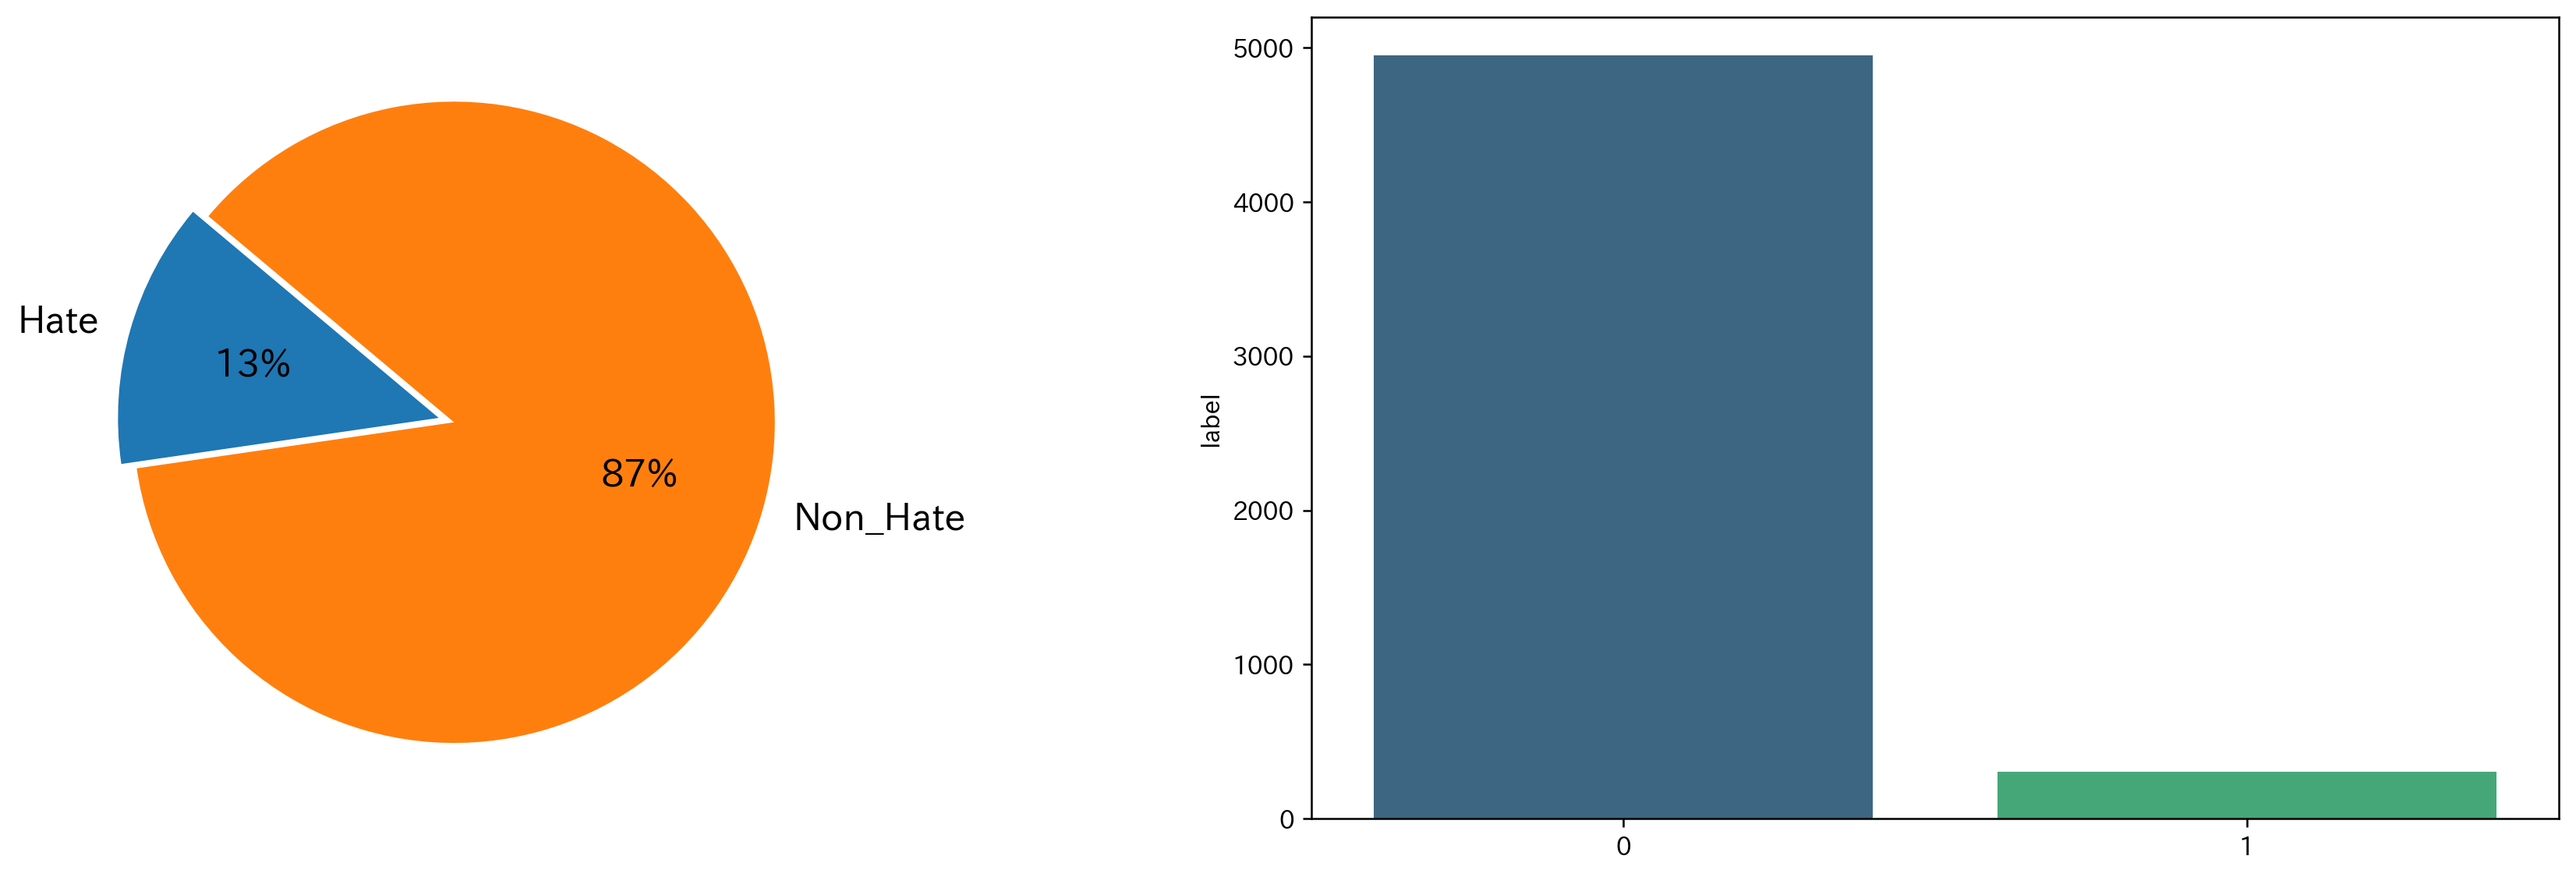

In [8]:
labels = ["Hate", "Non_Hate"]
sizes = [747, 4825]

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, textprops={"fontsize": 15}, startangle=140, autopct="%1.0f%%",explode=[0, 0.05])
plt.subplot(1, 2, 2)
sns.barplot(x=train["label"].unique(), y=train["label"].value_counts(), palette="viridis")
plt.show()

In [9]:
train.isnull().sum()

id        0
source    0
text      0
label     0
dtype: int64

In [10]:
train.describe(include="all")

,id,source,text,label
count,5256,5256,5256,5256.000000
unique,5256,3,5256,NaN
top,80074aa43,newsplus,まともに相手されてない人との関係なんて\nそんな大事にするものか？,NaN
freq,1,1967,1,NaN
mean,NaN,NaN,NaN,0.058219
std,NaN,NaN,NaN,0.234180
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


## 改行文字等削除

In [11]:
new_text = []

for line in train["text"]:
    line = line.strip("\n")
    line = line.replace("\n", "")
    line = line.rstrip("\u3000")
    line = line.replace("\u3000", "")
    new_text.append(line)

In [12]:
train["text"] = new_text
train

,id,source,text,label
0,80074aa43,news4vip,まともに相手されてない人との関係なんてそんな大事にするものか？,0
1,6378fea6b,livejupiter,最近はアヘアヘQSマンやない？ ｲｲ!(・∀・)+1-0(・Ａ・)ｲｸﾅｲ!,0
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ甘えるな,1
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよなガチャから引いたら圧倒的歓喜レベルやで,0
4,51e4036bf,newsplus,押井は原作レイプの専門家だから原作マンガの真意を誤解させることに関してはプロだがそれ以外には...,0
...,...,...,...,...
5251,42b5f86b0,news4vip,車じゃなくてもよくない？ケーブル網を張り巡らせてリフトみたいなのを付けるとか,0
5252,402ce15d9,livejupiter,左やぞ？出すなら下水流,0
5253,0739a9fcb,newsplus,日本によって、けんけんガクガクの議論を持たらされた韓国は被害者日本人がしっかり考えないと、、...,0
5254,d496c7dc8,news4vip,ゴムボート買って、沖まで漕いで行ったら？魚の血を塗っておけばサメが食べてくれるよ,0


## 文字数の列を追加

In [13]:
text_len = []

for line in train["text"]:
    line = line.strip("\n")
    line = line.replace("\n", "")
    line = line.rstrip("\u3000")
    line = line.replace("\u3000", "")
    text_len.append(len(line))

In [14]:
train["text_len"] = text_len
train

,id,source,text,label,text_len
0,80074aa43,news4vip,まともに相手されてない人との関係なんてそんな大事にするものか？,0,31
1,6378fea6b,livejupiter,最近はアヘアヘQSマンやない？ ｲｲ!(・∀・)+1-0(・Ａ・)ｲｸﾅｲ!,0,38
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ甘えるな,1,45
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよなガチャから引いたら圧倒的歓喜レベルやで,0,46
4,51e4036bf,newsplus,押井は原作レイプの専門家だから原作マンガの真意を誤解させることに関してはプロだがそれ以外には...,0,54
...,...,...,...,...,...
5251,42b5f86b0,news4vip,車じゃなくてもよくない？ケーブル網を張り巡らせてリフトみたいなのを付けるとか,0,38
5252,402ce15d9,livejupiter,左やぞ？出すなら下水流,0,11
5253,0739a9fcb,newsplus,日本によって、けんけんガクガクの議論を持たらされた韓国は被害者日本人がしっかり考えないと、、...,0,57
5254,d496c7dc8,news4vip,ゴムボート買って、沖まで漕いで行ったら？魚の血を塗っておけばサメが食べてくれるよ,0,40


## ヒストグラム（文字数、label）

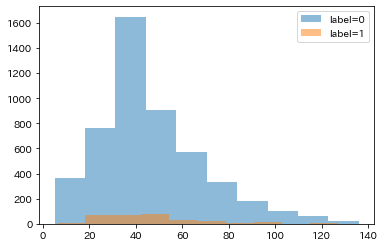

In [15]:
plt.hist(train[train["label"]==0]["text_len"], alpha = 0.5, label="label=0")
plt.hist(train[train["label"]==1]["text_len"], alpha = 0.5, label="label=1")
plt.legend(loc="upper right")

plt.show()

## 単語数の列を追加

### 分かち書き（MeCab）

In [16]:
m = MeCab.Tagger("-Owakati")

text_owakachi = []
for line in train["text"]:
    splited_line = m.parse(line)
    splited_line = splited_line.strip("\n")
    splited_line = splited_line.replace("\n", "")
    text_owakachi.append(splited_line)

In [17]:
train["text_owakachi"] = text_owakachi

train["word_count"] = train["text_owakachi"].apply(lambda x: len(x.split()))

In [18]:
train = train[["id", "source", "text", "text_len", "text_owakachi", "word_count", "label"]]
train.head()

,id,source,text,text_len,text_owakachi,word_count,label
0,80074aa43,news4vip,まともに相手されてない人との関係なんてそんな大事にするものか？,31,まとも に 相手 さ れ て ない 人 と の 関係 なんて そんな 大事 に する もの ...,19,0
1,6378fea6b,livejupiter,最近はアヘアヘQSマンやない？ ｲｲ!(・∀・)+1-0(・Ａ・)ｲｸﾅｲ!,38,最近 は アヘアヘ QS マン や ない ？ ｲｲ ! ( ・ ∀ ・ ) + 1 - ...,26,0
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ甘えるな,45,日本 人 と し て 生まれ て も 無能 な 低 学歴 って 分かっ たら 日本 人 の ...,28,1
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよなガチャから引いたら圧倒的歓喜レベルやで,46,よくよく 思え ば 川上 は 配布 に し たら とんでも なく 有能 だ よ な ガチャ ...,25,0
4,51e4036bf,newsplus,押井は原作レイプの専門家だから原作マンガの真意を誤解させることに関してはプロだがそれ以外には...,54,押井 は 原作 レイプ の 専門 家 だ から 原作 マンガ の 真意 を 誤解 さ せる ...,34,0


## ヒストグラム（単語数、label）

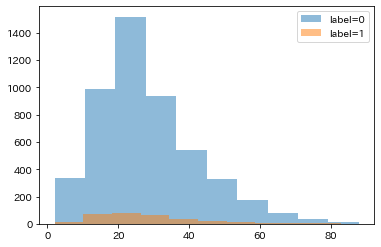

In [19]:
plt.hist(train[train["label"]==0]["word_count"], alpha = 0.5, label="label=0")
plt.hist(train[train["label"]==1]["word_count"], alpha = 0.5, label="label=1")
plt.legend(loc="upper right")

plt.show()

## 登場頻度の高い単語を描画

In [35]:
CHASEN_ARGS = r' -F "%m\t%f[7]\t%f[6]\t%F-[0,1,2,3]\t%f[4]\t%f[5]\n"'
CHASEN_ARGS += r' -U "%m\t%m\t%m\t%F-[0,1,2,3]\t\t\n"'
m = MeCab.Tagger(ipadic.MECAB_ARGS + CHASEN_ARGS)

# m = MeCab.Tagger("-Ochasen")

text_noun = []
for line in train["text"]:
    splited_line = m.parse(line)
    print(splited_line, "=================")

    
    # if "名詞" in splited_line.split()[-1]:
    splited_line = splited_line.strip("\n")
    splited_line = splited_line.replace("\n", "")
    
    text_noun.append(splited_line)

text_noun

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



福田	フクダ	福田	名詞-固有名詞-人名-姓		
は	ハ	は	助詞-係助詞		
まだしも	マダシモ	まだしも	副詞-一般		
フェルナンド	フェルナンド	フェルナンド	名詞-一般		
は	ハ	は	助詞-係助詞		
危うい	アヤウイ	危うい	形容詞-自立	形容詞・アウオ段	基本形
EOS
3	3	3	名詞-数		
回	カイ	回	名詞-接尾-助数詞		
ぐらい	グライ	ぐらい	助詞-副助詞		
あっ	アッ	ある	動詞-自立	五段・ラ行	連用タ接続
た	タ	た	助動詞	特殊・タ	基本形
から	カラ	から	助詞-接続助詞		
勘違い	カンチガイ	勘違い	名詞-サ変接続		
で	デ	で	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
ない	ナイ	ない	形容詞-自立	形容詞・アウオ段	基本形
と	ト	と	助詞-格助詞-引用		
思う	オモウ	思う	動詞-自立	五段・ワ行促音便	基本形
が	ガ	が	助詞-接続助詞		
割	ワリ	割	名詞-一般		
と	ト	と	助詞-格助詞-一般		
ある	アル	ある	動詞-自立	五段・ラ行	基本形
ん	ン	ん	名詞-非自立-一般		
や	ヤ	や	助動詞	特殊・ヤ	基本形
ね	ネ	ね	助詞-終助詞		
…	…	…	記号-一般		
サンガツ	サンガツ	サンガツ	名詞-固有名詞-組織		
EOS
中国	チュウゴク	中国	名詞-固有名詞-地域-国		
は	ハ	は	助詞-係助詞		
一人っ子	ヒトリッコ	一人っ子	名詞-一般		
政策	セイサク	政策	名詞-一般		
の	ノ	の	助詞-連体化		
ツケ	ツケ	ツケ	名詞-一般		
で	デ	で	助詞-格助詞-一般		
超	チョウ	超	接頭詞-名詞接続		
高齢	コウレイ	高齢	名詞-一般		
化	カ	化	名詞-接尾-サ変接続		
社会	シャカイ	社会	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
なっ	ナッ	なる	動詞-自立	五段・ラ行	連用タ接続
て	テ	て	助詞-接続助詞		
潰れる	ツブレル	潰れる	動詞-自立	一段	基本形
と	ト	と	助詞-格助詞-引用		
思っ	オモッ	思う	動詞-自立	五段・ワ行促音便	連用タ接続
てる	テル	てる	動詞-非自立	一段	基本形
ん	ン	ん	名詞-非自立-一般		
だ	ダ	だ	助動詞	特殊・ダ	基本形
が	ガ	が	助詞-接続助詞		
あと	アト	あと	名

['まとも\tマトモ\tまとも\t名詞-形容動詞語幹\t\tに\tニ\tに\t助詞-副詞化\t\t相手\tアイテ\t相手\t名詞-一般\t\tさ\tサ\tする\t動詞-自立\tサ変・スル\t未然レル接続れ\tレ\tれる\t動詞-接尾\t一段\t連用形て\tテ\tてる\t動詞-非自立\t一段\t未然形ない\tナイ\tない\t助動詞\t特殊・ナイ\t基本形人\tヒト\t人\t名詞-一般\t\tと\tト\tと\t助詞-格助詞-一般\t\tの\tノ\tの\t助詞-連体化\t\t関係\tカンケイ\t関係\t名詞-サ変接続\t\tなんて\tナンテ\tなんて\t助詞-副助詞\t\tそんな\tソンナ\tそんな\t連体詞\t\t大事\tダイジ\t大事\t名詞-形容動詞語幹\t\tに\tニ\tに\t助詞-格助詞-一般\t\tする\tスル\tする\t動詞-自立\tサ変・スル\t基本形もの\tモノ\tもの\t名詞-非自立-一般\t\tか\tカ\tか\t助詞-副助詞／並立助詞／終助詞\t\t？\t？\t？\t記号-一般\t\tEOS',
 '最近\tサイキン\t最近\t名詞-副詞可能\t\tは\tハ\tは\t助詞-係助詞\t\tアヘアヘ\tアヘアヘ\tアヘアヘ\t名詞-一般\t\tQS\tQS\tQS\t名詞-一般\t\tマン\tマン\tマン\t名詞-一般\t\tや\tヤ\tや\t助詞-並立助詞\t\tない\tナイ\tない\t形容詞-自立\t形容詞・アウオ段\t基本形？\t？\t？\t記号-一般\t\t\xa0\t\xa0\t\xa0\t記号-一般\t\tｲｲ\tｲｲ\tｲｲ\t名詞-一般\t\t!(\t!(\t!(\t記号-一般\t\t・\t・\t・\t記号-一般\t\t∀\t∀\t∀\t記号-一般\t\t・\t・\t・\t記号-一般\t\t)+\t)+\t)+\t記号-一般\t\t1\t1\t1\t名詞-数\t\t-\t-\t-\t記号-一般\t\t0\t0\t0\t名詞-数\t\t(\t(\t(\t記号-一般\t\t・\t・\t・\t記号-一般\t\tＡ\tエイ\tＡ\t記号-アルファベット\t\t・\t・\t・\t記号-一般\t\t)\t)\t)\t記号-一般\t\tｲｸﾅｲ\tｲｸﾅｲ\tｲｸﾅｲ\t名詞-一般\t\t!\t!\t!\t記号-一般\t\tEOS',
 '日本人\tニ

In [ ]:
train = train.copy()
train["text_noun"] = text_noun

train.head()

### Hate文

In [ ]:
all_hate_words = []
for sentence in train[train["label"] == 1]["text_owakachi"].to_list():
    for word in sentence.split():
        all_hate_words.append(word)

df = pd.DataFrame(Counter(all_hate_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Hate Words")
plt.xlabel("Frequnecy")
plt.ylabel("Hate Words")
plt.show()

### Non Hate文

In [ ]:
all_non_hate_words = []
for sentence in train[train["label"] == 0]["text_owakachi"].to_list():
    for word in sentence.split():
        all_non_hate_words.append(word)

df = pd.DataFrame(Counter(all_non_hate_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Non_Hate Words")
plt.xlabel("Frequnecy")
plt.ylabel("Non_Hate Words")
plt.show()